In [6]:
pip install nba_api

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install plotly

In [24]:
pip install plotly.express

  Using cached plotly-5.11.0-py2.py3-none-any.whl (15.3 MB)
  Attempting uninstall: plotly
    Found existing installation: plotly 2.7.0
    Uninstalling plotly-2.7.0:
      Successfully uninstalled plotly-2.7.0
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install plotly==2.7.0

  Using cached plotly-2.7.0-py3-none-any.whl
  Attempting uninstall: plotly
    Found existing installation: plotly 5.11.0
    Uninstalling plotly-5.11.0:
      Successfully uninstalled plotly-5.11.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotly-express 0.4.1 requires plotly>=4.1.0, but you have plotly 2.7.0 which is incompatible.


In [16]:
import pandas as pd
import numpy as np
import matplotlib

from scipy.stats import norm, gaussian_kde, percentileofscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.options.display.max_columns = None
from nba_api.stats.static import players
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import playercareerstats


# For Shot Chart
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
from matplotlib.path import Path
from matplotlib.patches import PathPatch

#import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

sns.set_style('white')
sns.set_color_codes()

import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [55]:
def get_player_shotchartdetail(player_name, season_id):
    nba_players = players.get_players()
    player_dict = [player for player in nba_players if player['full_name'] == player_name][0]
    
    career = playercareerstats.PlayerCareerStats(player_id=player_dict['id'])
    career_df = career.get_data_frames()[0]
    
    team_id = career_df[career_df['SEASON_ID'] == season_id]['TEAM_ID']
    
    shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id), 
                                                   player_id=int(player_dict['id']), 
                                                   season_type_all_star='Regular Season', 
                                                   season_nullable=season_id,
                                                   context_measure_simple="FGA").get_data_frames()
    
    return shotchartlist[0], shotchartlist[1]

In [56]:
player_shotchart_df, league_avg = get_player_shotchartdetail('LeBron James', '2015-16')

In [57]:
player_shotchart_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021500002,11,2544,LeBron James,1610612739,Cleveland Cavaliers,1,10,28,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,20,-191,65,1,1,20151027,CHI,CLE
1,Shot Chart Detail,0021500002,16,2544,LeBron James,1610612739,Cleveland Cavaliers,1,9,47,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,21,19,214,1,0,20151027,CHI,CLE
2,Shot Chart Detail,0021500002,19,2544,LeBron James,1610612739,Cleveland Cavaliers,1,9,16,Missed Shot,Fadeaway Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,-27,65,1,0,20151027,CHI,CLE
3,Shot Chart Detail,0021500002,24,2544,LeBron James,1610612739,Cleveland Cavaliers,1,9,2,Made Shot,Running Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,1,1,1,20151027,CHI,CLE
4,Shot Chart Detail,0021500002,35,2544,LeBron James,1610612739,Cleveland Cavaliers,1,7,57,Made Shot,Alley Oop Layup shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,19,21,1,1,20151027,CHI,CLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,Shot Chart Detail,0021501203,298,2544,LeBron James,1610612739,Cleveland Cavaliers,3,7,27,Missed Shot,Driving Floating Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,11,-110,36,1,0,20160411,CLE,ATL
1411,Shot Chart Detail,0021501203,312,2544,LeBron James,1610612739,Cleveland Cavaliers,3,6,23,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-161,203,1,1,20160411,CLE,ATL
1412,Shot Chart Detail,0021501203,321,2544,LeBron James,1610612739,Cleveland Cavaliers,3,5,34,Made Shot,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,5,-19,56,1,1,20160411,CLE,ATL
1413,Shot Chart Detail,0021501203,343,2544,LeBron James,1610612739,Cleveland Cavaliers,3,4,4,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-9,3,1,1,20160411,CLE,ATL


In [58]:
player_shotchart_df['LOC_X'].isnull().any().any()

False

In [59]:
league_avg

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,59,4,0.068
1,League Averages,Above the Break 3,Center(C),24+ ft.,10885,3746,0.344
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,16648,5802,0.349
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,15837,5597,0.353
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,440,17,0.039
5,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,6851,2889,0.422
6,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,19352,7561,0.391
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,2089,842,0.403
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,1932,799,0.414
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,7864,2939,0.374


In [7]:
# Reference : https://gist.github.com/giasemidis/2e271f98567b94f634b3b628921cc0bd 
# Used this as reference for drawing NBA court

In [8]:
def draw_court(ax=None, color="blue", lw=1, shotzone=False, outer_lines=False):
    if ax is None:
        ax = plt.gca()

    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)


    backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

 
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)

    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)


    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)

    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')

    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    

    if (shotzone == True):
        inner_circle = Circle((0, 0), radius=80, linewidth=lw, color='black', fill=False)
        outer_circle = Circle((0, 0), radius=160, linewidth=lw, color='black', fill=False)
        corner_three_a_x =  Rectangle((-250, 92.5), 30, 0, linewidth=lw, color=color)
        corner_three_b_x = Rectangle((220, 92.5), 30, 0, linewidth=lw, color=color)
        
        inner_line_1 = Rectangle((40, 69.28), 80, 0, 60, linewidth=lw, color=color)

        inner_line_2 = Rectangle((-40, 69.28), 80, 0, 120, linewidth=lw, color=color)
        
        inner_line_3 = Rectangle((53.20, 150.89), 290, 0, 70.53, linewidth=lw, color=color)
        inner_line_4 = Rectangle((-53.20, 150.89), 290, 0, 109.47, linewidth=lw, color=color)
        

        inner_line_5 = Rectangle((130.54, 92.5), 80, 0, 35.32, linewidth=lw, color=color)
        inner_line_6 = Rectangle((-130.54, 92.5), 80, 0, 144.68, linewidth=lw, color=color)
        
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc, inner_circle, outer_circle,
                          corner_three_a_x, corner_three_b_x,
                          inner_line_1, inner_line_2, inner_line_3, inner_line_4, inner_line_5, inner_line_6]
    else:
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc]
    
    if outer_lines:

        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    for element in court_elements:
        ax.add_patch(element)
        

    return ax

In [9]:
def player_shot(player_data, flip=False):

    x = (-250, 250)
    y = (420, -50)
    
    axis = plt.gca()
    
    if flip:
        axis.set_xlim(x[::-1])
        axis.set_ylim(y[::-1])
        
    else:
        axis.set_xlim(x)
        axis.set_ylim(y)

    axis.set_title("LeBron James Shot Chart", fontsize=14)

    draw_court(axis,  lw = 2, color = "blue")
   
    missed_shot_x = player_data[player_data['EVENT_TYPE'] == 'Missed Shot']['LOC_X']
    missed_shot_y = player_data[player_data['EVENT_TYPE'] == 'Missed Shot']['LOC_Y']

    made_shot_x = player_data[player_data['EVENT_TYPE'] == 'Made Shot']['LOC_X']
    made_shot_y = player_data[player_data['EVENT_TYPE'] == 'Made Shot']['LOC_Y']

    axis.scatter(missed_shot_x, missed_shot_y, linewidths=3,  s=300, c='r', marker="x")

    axis.scatter(made_shot_x, made_shot_y, linewidths=3,  s=100, marker="o", edgecolors='g', facecolors='none')

    for sp in axis.spines:
        axis.spines[sp].set_color("blue")
        axis.spines[sp].set_lw(2)

    return axis

In [10]:
plt.rcParams['figure.figsize'] = (12, 11)

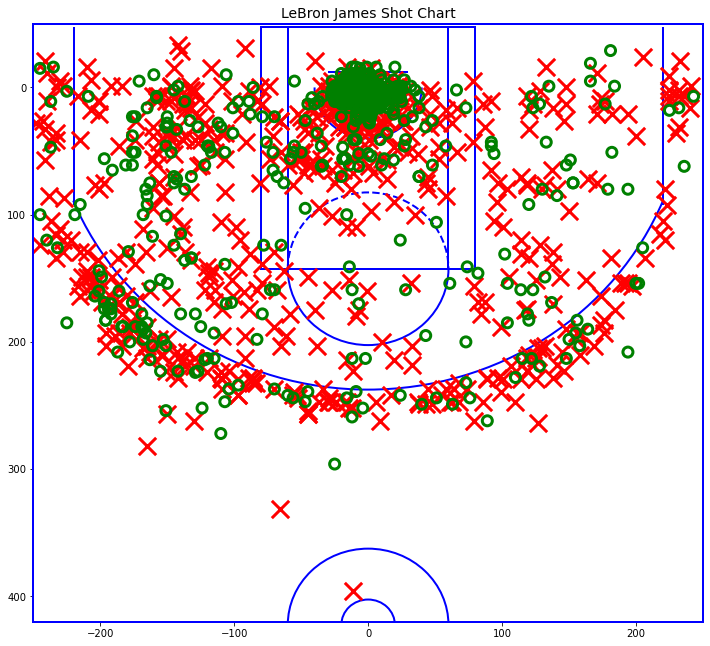

Field Goal Percentage:  0.521 (737-1415)


In [11]:
player_shot(player_shotchart_df)
per = player_shotchart_df['SHOT_MADE_FLAG'].sum()/len(player_shotchart_df)
plt.rcParams['figure.figsize'] = (12, 11)
plt.show()
print("Field Goal Percentage: ", "{0:.3f}".format(per), "({0}-{1})".format(player_shotchart_df['SHOT_MADE_FLAG'].sum(),len(player_shotchart_df)))

In [12]:
def hex_collection(axis, hex1, hex2, cmap, norm):
    
    offset = hex1.get_offsets()
    paths = hex1.get_paths()[0]
    path_vert = paths.vertices
    arr1 = hex1.get_array()
    arr2 = hex2.get_array()
    #arr_max = arr1.max()
    patch_coll = []

    for item, value in zip(offset,arr1):
        arr_filt = list(filter(lambda i: i != 0, arr1))
        
        if (int(value) == 0):
            continue
            
        elif (percentileofscore(arr_filt, value) < 33.33):
            val1 = path_vert*0.3 + item
            
        elif (percentileofscore(arr_filt, value) > 69.99):
            val1 = path_vert + item
            
        else:
            val1 = path_vert*0.6 + item
        
        path_val1 = Path(val1, paths.codes)
        patch_val1 = PathPatch(path_val1)
        patch_coll.append(patch_val1)

    patch1 = PatchCollection(patch_coll,norm=norm,cmap=cmap)
    patch1.set_array(arr2)

    axis.add_collection(patch1)
    hex1.remove()
    hex2.remove()

def shot_hexmap(short_data, league_avg, color="b",
               flip=False):
    
    shot_made_list = ['SHOT_ZONE_AREA','SHOT_ZONE_RANGE','SHOT_MADE_FLAG']
    area_list = ['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE']
    shot_range_list = ['SHOT_ZONE_AREA','SHOT_ZONE_RANGE', 'FGA', 'FGM']
    
    x = (-250, 250)
    y = (420, -50)
    extent = [-275, 275, -50, 425]
    
    leag_location = league_avg.loc[:,shot_range_list]
    leag_group = leag_location.groupby(area_list)
    leag_sum = leag_group.sum()
    leag_sum['FGP'] = 1.0*leag_sum['FGM']/leag_sum['FGA']

    player_data = short_data.groupby(shot_made_list).size()
    player_unstack = player_data.unstack(fill_value=0)
    player_unstack['FGP'] = 1.0*player_unstack.loc[:,1]/player_unstack.sum(axis=1)
    player_loc = (player_unstack.loc[:,'FGP'] - leag_sum.loc[:,'FGP'])*100  

    short_data = pd.merge(short_data, player_loc, on = area_list, how = 'right')
    
    axis = plt.gca()
    axis.set_facecolor("#1a477b")

    if flip:
        axis.set_xlim(x[::-1])
        axis.set_ylim(y[::-1])
        
    else:
        axis.set_xlim(x)
        axis.set_ylim(y)

    axis.tick_params(labelbottom="off", labelleft="off")
    axis.set_title("LeBron James Hex Chart", fontsize=18)

    draw_court(axis, color="white", lw=2, outer_lines=False)

    x_data = short_data['LOC_X']
    y_data = short_data['LOC_Y']

    colors = ['#2b7cb6', '#abd9e9', '#ffffbf', '#fdaf61', '#d7191c', '#ff71c1']
    cmap = ListedColormap(colors)

    boundaries = [-np.inf, -9, -3, 0, 3, 9, np.inf]
    norm = BoundaryNorm(boundaries, cmap.N, clip=True)   
    
    hex1 = axis.hexbin(x_data, y_data, cmap=cmap, gridsize=40,norm=norm, extent = extent)
    FGP_hex = axis.hexbin(x_data, y_data, norm=norm, C=short_data['FGP'], gridsize=40, cmap=cmap, extent = extent)
    hex_collection(axis, hex1, FGP_hex, cmap, norm) 
    
    for sp in axis.spines:
        axis.spines[sp].set_color("white")
        axis.spines[sp].set_lw(2)

    return axis

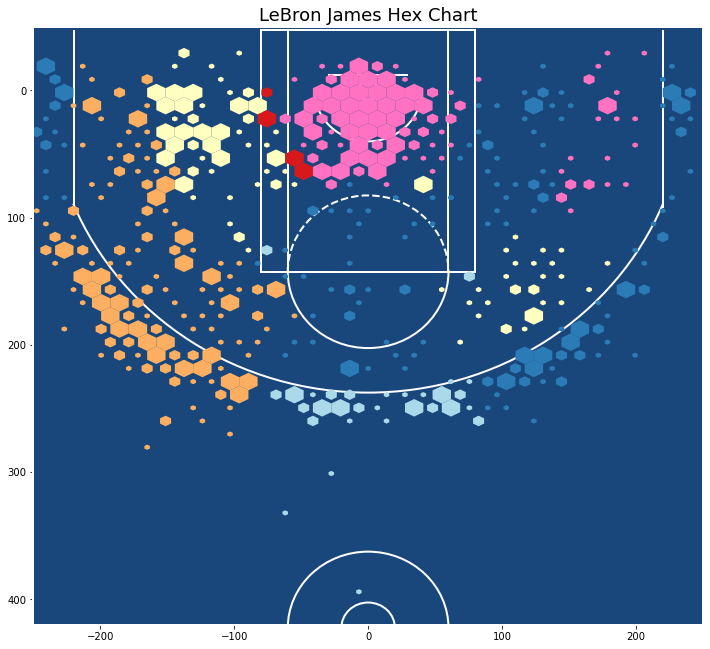

In [13]:
shot_hexmap(player_shotchart_df, league_avg, flip = False)
plt.show()

In [14]:
def player_shot_zon(short_data, league_avg, flip=False):
    
    x = (-250, 250)
    y = (420, -50)
    
    shot_range_list = ['SHOT_ZONE_AREA','SHOT_ZONE_RANGE', 'FGA', 'FGM']
    shot_made_list = ['SHOT_ZONE_AREA','SHOT_ZONE_RANGE','SHOT_MADE_FLAG']
    area_list = ['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE']
    axis = plt.gca()
    axis.set_facecolor("white")

    if flip:
        axis.set_xlim(x[::-1])
        axis.set_ylim(y[::-1])
        
    else:
        axis.set_xlim(x)
        axis.set_ylim(y)

    axis.set_title("LeBron James Shot Zones", fontsize=14)
    
    draw_court(axis, color="black", lw=2, shotzone=True)
    
    leag_location = league_avg.loc[:,shot_range_list]
    leag_group = leag_location.groupby(area_list)
    leag_sum = leag_group.sum()
    leag_sum['FGP'] = 1.0*leag_sum['FGM']/leag_sum['FGA']
    print(leag_sum)
    
    player_data = short_data.groupby(shot_made_list).size()
    player_unstack = player_data.unstack()
    player_unstack['FGP'] = 1.0*player_unstack.loc[:,1]/player_unstack.sum(axis=1)
    player_loc = (player_unstack.loc[:,'FGP'] - leag_sum.loc[:,'FGP'])*100  
    print(player_loc)

    short_data = pd.merge(short_data, player_loc, on = area_list, how='right')

    x_shot_made = short_data[short_data['EVENT_TYPE'] == 'Made Shot']['LOC_X']
    y_shot_made = short_data[short_data['EVENT_TYPE'] == 'Made Shot']['LOC_Y']

    axis.scatter(x_shot_made, y_shot_made, s=100, edgecolors='b', facecolors='none', linewidths=3)

    for sp in axis.spines:
        axis.spines[sp].set_color("black")
        axis.spines[sp].set_lw(2)

                                         FGA    FGM       FGP
SHOT_ZONE_AREA        SHOT_ZONE_RANGE                        
Back Court(BC)        Back Court Shot    499     21  0.042084
Center(C)             16-24 ft.         7324   2897  0.395549
                      24+ ft.          10885   3746  0.344143
                      8-16 ft.          9116   3876  0.425186
                      Less Than 8 ft.  86795  48195  0.555274
Left Side Center(LC)  16-24 ft.         7754   3066  0.395409
                      24+ ft.          16648   5802  0.348510
Left Side(L)          16-24 ft.         5452   2173  0.398569
                      24+ ft.           7864   2939  0.373728
                      8-16 ft.          9728   3847  0.395456
Right Side Center(RC) 16-24 ft.         8145   3249  0.398895
                      24+ ft.          15837   5597  0.353413
Right Side(R)         16-24 ft.         4924   1996  0.405361
                      24+ ft.           7360   2803  0.380842
        

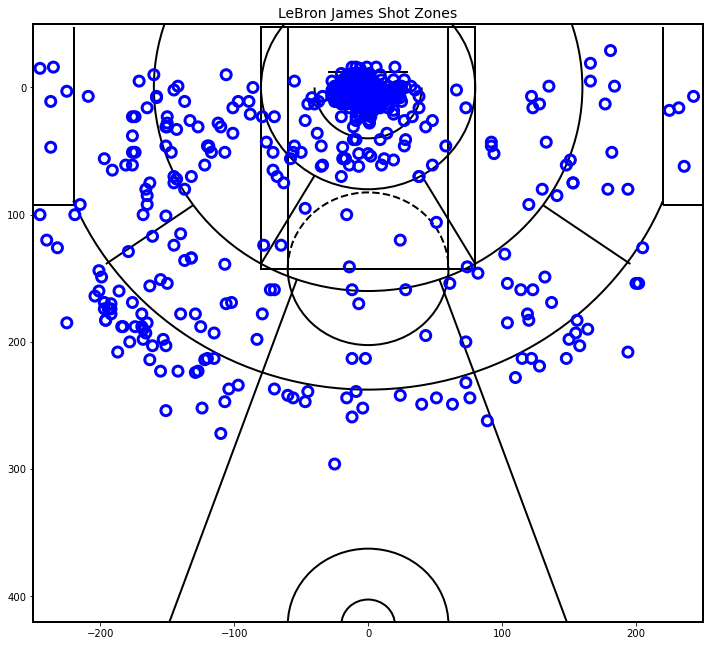

In [15]:
player_shot_zon(player_shotchart_df, league_avg, flip = False)

In [16]:
def heatmap_location(data, flip = False):
    
    x=(-250, 250)
    y=(420, -50)
        
    axis = plt.gca()
    
    if flip:
        axis.set_xlim(x[::-1])
        axis.set_ylim(y[::-1])
        
    else:
        axis.set_xlim(x)
        axis.set_ylim(y)

    draw_court(axis, lw = 2, color = "white")
    
    x_data = data['LOC_X']
    y_data = data['LOC_Y']
    
    sns.kdeplot(x_data, y_data, cmap='inferno', ax=axis, shade=True)

    axis.scatter(x_data, y_data, linewidths=0.2, facecolors='w', s=2)
  
    for sp in axis.spines:
        axis.spines[sp].set_color("white")
        axis.spines[sp].set_lw(2)

    return axis

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='LOC_X', ylabel='LOC_Y'>

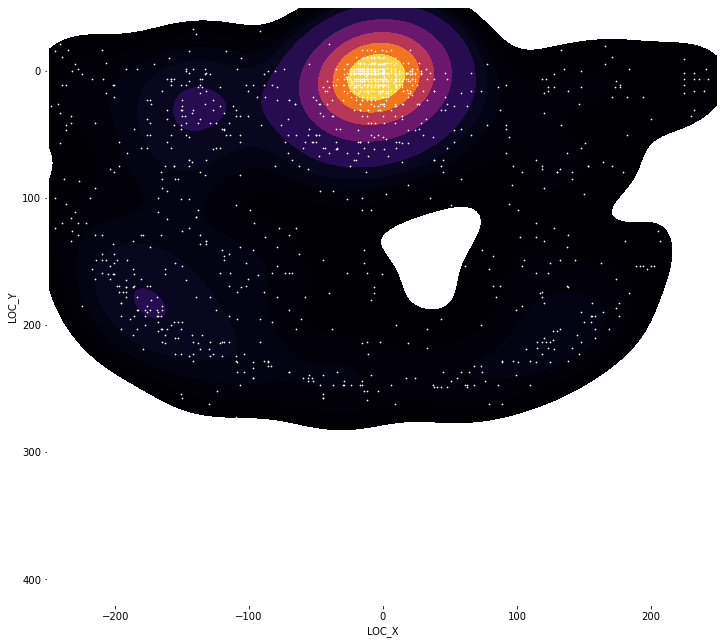

In [17]:
heatmap_location(player_shotchart_df)

In [18]:
f=['SHOT_ZONE_RANGE','FGA','FGM','FG_PCT']
features1=league_avg[f]
features1

,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,Back Court Shot,59,4,0.068
1,24+ ft.,10885,3746,0.344
2,24+ ft.,16648,5802,0.349
3,24+ ft.,15837,5597,0.353
4,Back Court Shot,440,17,0.039
5,8-16 ft.,6851,2889,0.422
6,Less Than 8 ft.,19352,7561,0.391
7,8-16 ft.,2089,842,0.403
8,8-16 ft.,1932,799,0.414
9,24+ ft.,7864,2939,0.374


In [19]:
player_shotchart_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021500002,11,2544,LeBron James,1610612739,Cleveland Cavaliers,1,10,28,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,20,-191,65,1,1,20151027,CHI,CLE
1,Shot Chart Detail,0021500002,16,2544,LeBron James,1610612739,Cleveland Cavaliers,1,9,47,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,21,19,214,1,0,20151027,CHI,CLE
2,Shot Chart Detail,0021500002,19,2544,LeBron James,1610612739,Cleveland Cavaliers,1,9,16,Missed Shot,Fadeaway Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,-27,65,1,0,20151027,CHI,CLE
3,Shot Chart Detail,0021500002,24,2544,LeBron James,1610612739,Cleveland Cavaliers,1,9,2,Made Shot,Running Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,1,1,1,20151027,CHI,CLE
4,Shot Chart Detail,0021500002,35,2544,LeBron James,1610612739,Cleveland Cavaliers,1,7,57,Made Shot,Alley Oop Layup shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,19,21,1,1,20151027,CHI,CLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,Shot Chart Detail,0021501203,298,2544,LeBron James,1610612739,Cleveland Cavaliers,3,7,27,Missed Shot,Driving Floating Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,11,-110,36,1,0,20160411,CLE,ATL
1411,Shot Chart Detail,0021501203,312,2544,LeBron James,1610612739,Cleveland Cavaliers,3,6,23,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-161,203,1,1,20160411,CLE,ATL
1412,Shot Chart Detail,0021501203,321,2544,LeBron James,1610612739,Cleveland Cavaliers,3,5,34,Made Shot,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,5,-19,56,1,1,20160411,CLE,ATL
1413,Shot Chart Detail,0021501203,343,2544,LeBron James,1610612739,Cleveland Cavaliers,3,4,4,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-9,3,1,1,20160411,CLE,ATL


In [20]:
shots_df = player_shotchart_df[player_shotchart_df.PLAYER_NAME == 'LeBron James']
shots_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021500002,11,2544,LeBron James,1610612739,Cleveland Cavaliers,1,10,28,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,20,-191,65,1,1,20151027,CHI,CLE
1,Shot Chart Detail,0021500002,16,2544,LeBron James,1610612739,Cleveland Cavaliers,1,9,47,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,21,19,214,1,0,20151027,CHI,CLE
2,Shot Chart Detail,0021500002,19,2544,LeBron James,1610612739,Cleveland Cavaliers,1,9,16,Missed Shot,Fadeaway Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,-27,65,1,0,20151027,CHI,CLE
3,Shot Chart Detail,0021500002,24,2544,LeBron James,1610612739,Cleveland Cavaliers,1,9,2,Made Shot,Running Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,1,1,1,20151027,CHI,CLE
4,Shot Chart Detail,0021500002,35,2544,LeBron James,1610612739,Cleveland Cavaliers,1,7,57,Made Shot,Alley Oop Layup shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,19,21,1,1,20151027,CHI,CLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,Shot Chart Detail,0021501203,298,2544,LeBron James,1610612739,Cleveland Cavaliers,3,7,27,Missed Shot,Driving Floating Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,11,-110,36,1,0,20160411,CLE,ATL
1411,Shot Chart Detail,0021501203,312,2544,LeBron James,1610612739,Cleveland Cavaliers,3,6,23,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-161,203,1,1,20160411,CLE,ATL
1412,Shot Chart Detail,0021501203,321,2544,LeBron James,1610612739,Cleveland Cavaliers,3,5,34,Made Shot,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,5,-19,56,1,1,20160411,CLE,ATL
1413,Shot Chart Detail,0021501203,343,2544,LeBron James,1610612739,Cleveland Cavaliers,3,4,4,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-9,3,1,1,20160411,CLE,ATL


In [21]:
shots_df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [22]:

court_shapes = []

#Outer Lines
outer_lines_shape = dict(
    type='rect',
    xref='x',
    yref='y',
    x0='-250',
    y0='-47.5',
    x1='250',
    y1='422.5',
    line=dict(
        color='rgba(10, 10, 10, 1)',
        width=1
    )
)
 
court_shapes.append(outer_lines_shape)

#Hoop Shape
hoop_shape = dict(
    type='circle',
    xref='x',
    yref='y',
    x0='7.5',
    y0='7.5',
    x1='-7.5',
    y1='-7.5',
    line=dict(
        color='rgba(10, 10, 10, 1)',
        width=1
    )
)
 
court_shapes.append(hoop_shape)

#Basket Backboard
backboard_shape = dict(
    type='rect',
    xref='x',
    yref='y',
    x0='-30',
    y0='-7.5',
    x1='30',
    y1='-6.5',
    line=dict(
        color='rgba(10, 10, 10, 1)',
        width=1
    ),
    fillcolor='rgba(10, 10, 10, 1)'
)
 
court_shapes.append(backboard_shape)

#Outer Box of Three-Second Area
outer_three_sec_shape = dict(
    type='rect',
    xref='x',
    yref='y',
    x0='-80',
    y0='-47.5',
    x1='80',
    y1='143.5',
    line=dict(
        color='rgba(10, 10, 10, 1)',
        width=1
    )
)
 
court_shapes.append(outer_three_sec_shape)

#Inner Box of Three-Second Area
inner_three_sec_shape = dict(
    type='rect',
    xref='x',
    yref='y',
    x0='-60',
    y0='-47.5',
    x1='60',
    y1='143.5',
    line=dict(
        color='rgba(10, 10, 10, 1)',
        width=1
    )
)
 
court_shapes.append(inner_three_sec_shape)

#Three Point Line (Left)
left_line_shape = dict(
    type='line',
    xref='x',
    yref='y',
    x0='-220',
    y0='-47.5',
    x1='-220',
    y1='92.5',
    line=dict(
        color='rgba(10, 10, 10, 1)',
        width=1
    )
)
 
court_shapes.append(left_line_shape)

#Three Point Line (Right)
right_line_shape = dict(
    type='line',
    xref='x',
    yref='y',
    x0='220',
    y0='-47.5',
    x1='220',
    y1='92.5',
    line=dict(
        color='rgba(10, 10, 10, 1)',
        width=1
    )
)
 
court_shapes.append(right_line_shape)

#Three Point Line Arc
three_point_arc_shape = dict(
    type='path',
    xref='x',
    yref='y',
    path='M -220 92.5 C -70 300, 70 300, 220 92.5',
    line=dict(
        color='rgba(10, 10, 10, 1)',
        width=1
    )
)
 
court_shapes.append(three_point_arc_shape)

#Center Circle
center_circle_shape = dict(
    type='circle',
    xref='x',
    yref='y',
    x0='60',
    y0='482.5',
    x1='-60',
    y1='362.5',
    line=dict(
        color='rgba(10, 10, 10, 1)',
        width=1
    )
)
 
court_shapes.append(center_circle_shape)

#Restraining Circle
res_circle_shape = dict(
    type='circle',
    xref='x',
    yref='y',
    x0='20',
    y0='442.5',
    x1='-20',
    y1='402.5',
    line=dict(
        color='rgba(10, 10, 10, 1)',
        width=1
    )
)
 
court_shapes.append(res_circle_shape)

#Free Throw Circle
free_throw_circle_shape = dict(
    type='circle',
    xref='x',
    yref='y',
    x0='60',
    y0='200',
    x1='-60',
    y1='80',
    line=dict(
        color='rgba(10, 10, 10, 1)',
        width=1
    )
)
 
court_shapes.append(free_throw_circle_shape)

#Restricted Area
res_area_shape = dict(
    type='circle',
    xref='x',
    yref='y',
    x0='40',
    y0='40',
    x1='-40',
    y1='-40',
    line=dict(
        color='rgba(10, 10, 10, 1)',
        width=1,
        dash='dot'
    )
)
 
court_shapes.append(res_area_shape)

In [23]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

def updateVisibility(selectedPlayer):
    visibilityValues = []
    for player in list(shots_df.PLAYER_NAME.unique()):
        if player == selectedPlayer:
            visibilityValues.append(True)
            visibilityValues.append(True)
        else:
            visibilityValues.append(False)
            visibilityValues.append(False)
    return visibilityValues

data = []
buttons_data = []
for player in list(shots_df.PLAYER_NAME.unique()):
    shot_trace_made = go.Scatter(
        x = shots_df[(shots_df['EVENT_TYPE'] == 'Made Shot') & (shots_df['PLAYER_NAME'] == player)]['LOC_X'],
        y = shots_df[(shots_df['EVENT_TYPE'] == 'Made Shot') & (shots_df['PLAYER_NAME'] == player)]['LOC_Y'],
        mode = 'markers',
        marker = dict(
            size = 6,
            color = 'rgba(63, 191, 63, 0.9)',
        ), 
        name = 'Made',
        text = shots_df[(shots_df['EVENT_TYPE'] == 'Made Shot') & (shots_df['PLAYER_NAME'] == player)]['SHOT_ZONE_BASIC'],
        textposition = 'auto',
        textfont = dict(
            color = 'rgba(75, 85, 102,0.7)'
        ),
        visible = (player =='LeBron James')
    )

    shot_trace_missed = go.Scatter(
        x = shots_df[(shots_df['EVENT_TYPE'] == 'Missed Shot') & (shots_df['PLAYER_NAME'] == player)]['LOC_X'],
        y = shots_df[(shots_df['EVENT_TYPE'] == 'Missed Shot') & (shots_df['PLAYER_NAME'] == player)]['LOC_Y'],
        mode = 'markers',
        marker = dict(
            size = 6,
            color = 'rgba(241, 18, 18, 0.9)',
        ), 
        name = 'Missed',
        text = shots_df[(shots_df['EVENT_TYPE'] == 'Missed Shot') & (shots_df['PLAYER_NAME'] == player)]['SHOT_ZONE_BASIC'],
        textposition = 'auto',
        textfont = dict(
            color = 'rgba(75, 85, 102, 0.7)'
        ),
        visible = (player =='LeBron James')
    )

    data.append(shot_trace_made)
    data.append(shot_trace_missed)
    
    buttons_data.append(
        dict(
            label = player,
            method = 'update',
            args = [{'visible': updateVisibility(player)}]
        )
    )
    

updatemenus = list([
    dict(active=0,
         buttons = buttons_data,
         direction = 'down',
         pad = {'r': 10, 't': 10},
         showactive = True,
         x = 0.21,
         xanchor = 'left',
         y = 1.19,
         yanchor = 'top',
         font = dict (
             size = 14
         )
    )
])

layout = go.Layout(
    title='________________ Shot Chart',
    titlefont=dict(
        size=14
    ),
    hovermode = 'closest',
    updatemenus = updatemenus,
    showlegend = True,
    height = 600,
    width = 600, 
    shapes = court_shapes,
    xaxis = dict(
        showticklabels = False
    ),
    yaxis = dict(
        showticklabels = False
    )
)
 
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [1]:
from nba_api.stats.endpoints import playercareerstats

In [2]:
# LeBron James
career = playercareerstats.PlayerCareerStats(player_id='2544') 


In [3]:
career_df = career.get_data_frames()[0]

In [4]:
career_df.shape

(20, 27)

In [5]:
career_df

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2544,2003-04,00,1610612739,CLE,19.0,79,79,3120.0,622,...,0.754,99,333,432,465,130,58,273,149,1654
1,2544,2004-05,00,1610612739,CLE,20.0,80,80,3388.0,795,...,0.750,111,477,588,577,177,52,262,146,2175
2,2544,2005-06,00,1610612739,CLE,21.0,79,79,3361.0,875,...,0.738,75,481,556,521,123,66,260,181,2478
3,2544,2006-07,00,1610612739,CLE,22.0,78,78,3190.0,772,...,0.698,83,443,526,470,125,55,250,171,2132
4,2544,2007-08,00,1610612739,CLE,23.0,75,74,3027.0,794,...,0.712,133,459,592,539,138,81,255,165,2250
5,2544,2008-09,00,1610612739,CLE,24.0,81,81,3054.0,789,...,0.780,106,507,613,587,137,93,241,139,2304
6,2544,2009-10,00,1610612739,CLE,25.0,76,76,2966.0,768,...,0.767,71,483,554,651,125,77,261,119,2258
7,2544,2010-11,00,1610612748,MIA,26.0,79,79,3063.0,758,...,0.759,80,510,590,554,124,50,284,163,2111
8,2544,2011-12,00,1610612748,MIA,27.0,62,62,2326.0,621,...,0.771,94,398,492,387,115,50,213,96,1683
9,2544,2012-13,00,1610612748,MIA,28.0,76,76,2877.0,765,...,0.753,97,513,610,551,129,67,226,110,2036


In [6]:
career_df

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2544,2003-04,00,1610612739,CLE,19.0,79,79,3120.0,622,...,0.754,99,333,432,465,130,58,273,149,1654
1,2544,2004-05,00,1610612739,CLE,20.0,80,80,3388.0,795,...,0.750,111,477,588,577,177,52,262,146,2175
2,2544,2005-06,00,1610612739,CLE,21.0,79,79,3361.0,875,...,0.738,75,481,556,521,123,66,260,181,2478
3,2544,2006-07,00,1610612739,CLE,22.0,78,78,3190.0,772,...,0.698,83,443,526,470,125,55,250,171,2132
4,2544,2007-08,00,1610612739,CLE,23.0,75,74,3027.0,794,...,0.712,133,459,592,539,138,81,255,165,2250
5,2544,2008-09,00,1610612739,CLE,24.0,81,81,3054.0,789,...,0.780,106,507,613,587,137,93,241,139,2304
6,2544,2009-10,00,1610612739,CLE,25.0,76,76,2966.0,768,...,0.767,71,483,554,651,125,77,261,119,2258
7,2544,2010-11,00,1610612748,MIA,26.0,79,79,3063.0,758,...,0.759,80,510,590,554,124,50,284,163,2111
8,2544,2011-12,00,1610612748,MIA,27.0,62,62,2326.0,621,...,0.771,94,398,492,387,115,50,213,96,1683
9,2544,2012-13,00,1610612748,MIA,28.0,76,76,2877.0,765,...,0.753,97,513,610,551,129,67,226,110,2036


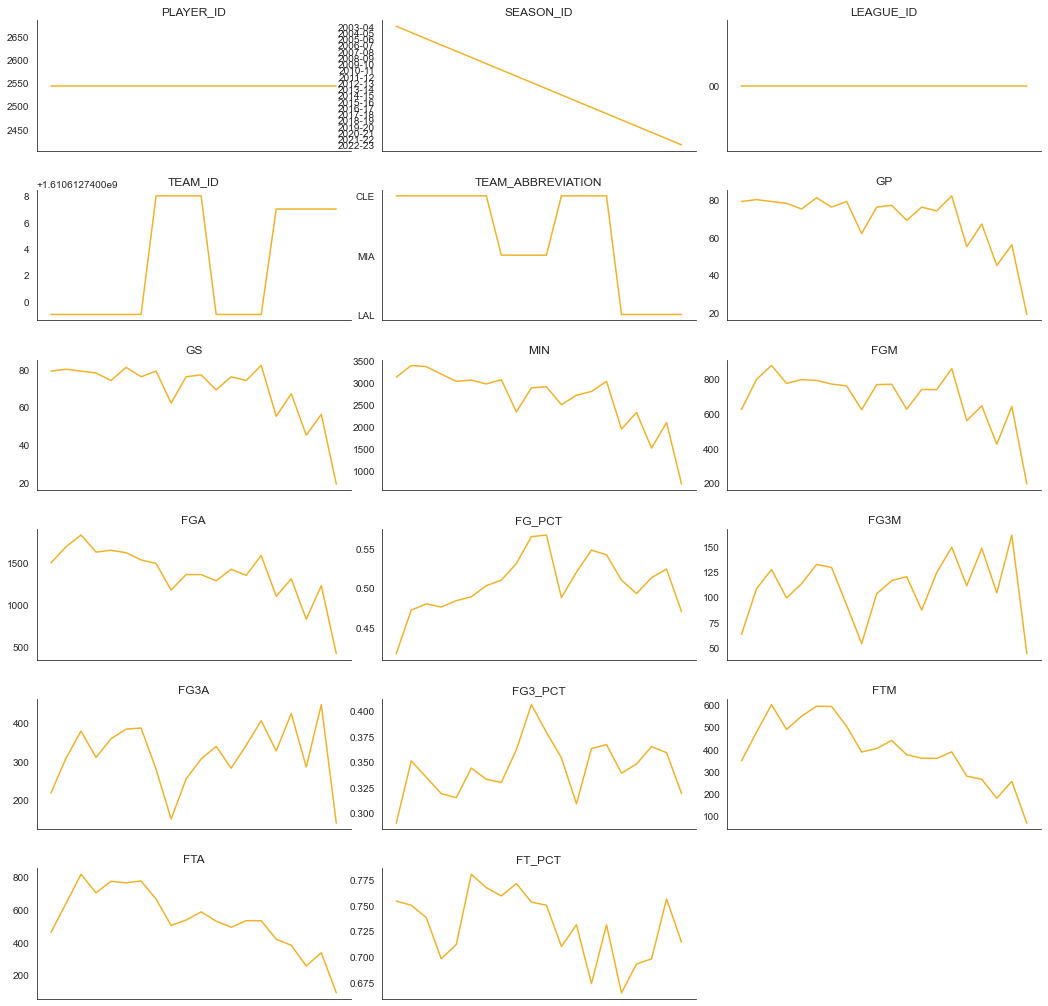

In [10]:
import matplotlib as mpl
main_colors = ['#20448b', '#f1b229', '#8e7e55', '#8e9fc3']
sns.set_palette(sns.color_palette(main_colors))
cmap = mpl.colors.LinearSegmentedColormap.from_list('', ['white', main_colors[1]])

regular_stats1 = career_df.drop(['PLAYER_ID'],axis = 1)
regular_stats2 = career_df.drop(['SEASON_ID'],axis = 1)
regular_stats3 = career_df.drop(['PLAYER_AGE'],axis = 1)
regular_stats4 = career_df.drop(['LEAGUE_ID'],axis = 1)
regular_stats5 = career_df.drop(['TEAM_ID'],axis = 1)
regular_stats6 = career_df.drop(['TEAM_ABBREVIATION'],axis = 1)
regular_stats7 = career_df.drop(['PLAYER_AGE'],axis = 1)

cols = regular_stats7.columns

f, ax = plt.subplots(6, 3, figsize=(18,18))

for i in range(6):
    for j in range(3):
        if (i*3)+j < 17:
            sns.lineplot(data=regular_stats7, x=regular_stats7.index, 
                         y=regular_stats7[cols[(i*3)+j]], color=main_colors[1], ax=ax[i][j])
            ax[i][j].set_title('{}'.format(cols[(i*3)+j]))
            ax[i][j].set_xticks([])
            ax[i][j].set_ylabel('')
            
        else:
            pass
        
ax.flatten()[-1].axis('off')
sns.despine()
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

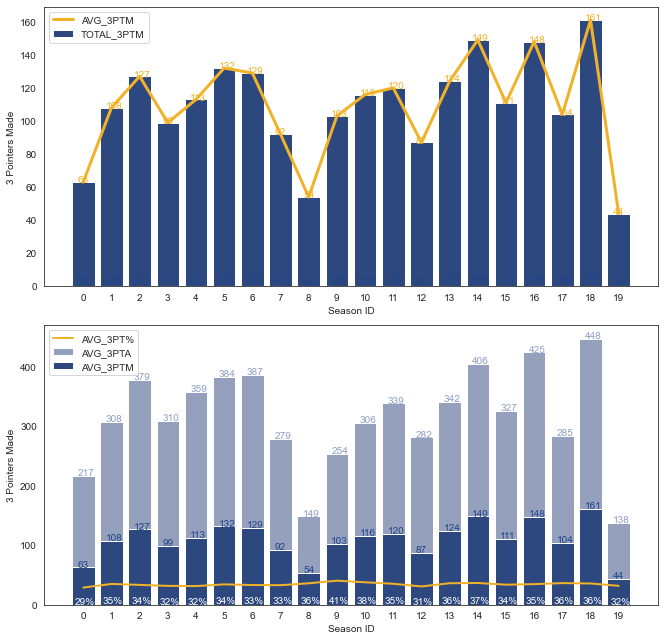

In [11]:
career_df_cop = career_df
career_df_2 = career_df

fig, ax = plt.subplots(2, 1, figsize = (11,11))

x2 = career_df_2.index
x = career_df_cop.index

value_df_cop = career_df_cop['FG3M'].values
value_df_2 = career_df_2['FG3M'].values

exc_per = ax[0]
inc_per = ax[1]

sns.barplot(x = x2, y = career_df_2['FG3M'], data = career_df_2,
             color = main_colors[0],  ax = exc_per, label = 'TOTAL_3PTM')
sns.lineplot(x = x, y=career_df_cop['FG3M'], data=career_df_cop, 
            color=main_colors[1], linewidth=3, ax=exc_per, label='AVG_3PTM')


for val in range(len(value_df_cop)):
    exc_per.text(s=value_df_cop[val], x=(val-0.2), y=value_df_cop[val]-0.5, fontsize=10, color=main_colors[1])
    exc_per.text(s=value_df_2[val], x=(val-0.2), y=(value_df_2[val]/50)+0.1, fontsize=10, color=main_colors[0])
exc_per.legend(loc='upper left')
exc_per.set_ylabel('3 Pointers Made')
exc_per.set_xlabel('Season ID')

# Including percentage 
sns.barplot(data=career_df_cop, x = x, y=career_df_cop['FG3A'],
            ax=inc_per, color = main_colors[3], label = 'AVG_3PTA',)
sns.barplot(data=career_df_cop, x = x, y=career_df_cop['FG3M'], 
            ax=inc_per, color=main_colors[0], label='AVG_3PTM')
sns.lineplot(data=career_df_cop, x = x, y=career_df_cop['FG3_PCT']*100, 
            linewidth=2, label='AVG_3PT%', ax=inc_per, color=main_colors[1])

fg3a_val = career_df_cop['FG3A'].values
fg3m_val = career_df_cop['FG3M'].values
fg3pt_val = career_df_cop['FG3_PCT'].values*100

for val in range(len(fg3a_val)):
    inc_per.text(s=fg3a_val[val], x=(val-0.2), y=fg3a_val[val]+0.1,color=main_colors[3],fontsize=10)
    inc_per.text(s=fg3m_val[val], x=(val-0.2), y=fg3m_val[val]+0.1, color=main_colors[0], fontsize=10)
    inc_per.text(s='{}%'.format(round(fg3pt_val[val])),  fontsize=10, x=(val-0.3), y=(fg3pt_val[val]/20)-0.5, color = "white")

inc_per.set_ylabel('3 Pointers Made')
inc_per.set_xlabel('Season ID')

plt.subplots_adjust(hspace=0.14, wspace=0.1)
plt.show()

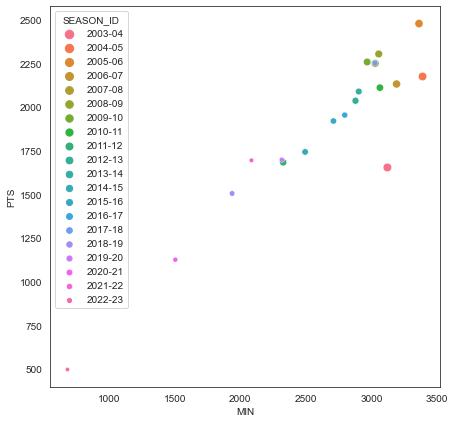

In [12]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=career_df, x='MIN', y='PTS', hue='SEASON_ID', 
                size='SEASON_ID', ax=ax)
plt.show()

In [15]:
fig = px.bar(career_df,x='PTS',color='PTS',title='Points Per Game',
            labels={
                "REB": "No of Points",
                "index":"Season Year(2011-2023)"
            })
fig.show()

In [17]:
fig = px.bar(career_df,x='REB',color='REB',title='Rebounds Per Game',
            labels={
                "REB": "No of Rebounds",
                "index":"Season Year(2009-2023)"
            })
fig.show()

In [18]:
# Assists Per Game 
fig = px.bar(career_df,x='AST',color='SEASON_ID',title='Assists Per Game',
            labels={
                "AST": "No of Assists",
                "index":"Season Year(2009-2023)"
            })
fig.show()

In [21]:
fig = px.bar(career_df, hover_data = ["PTS"], 
                    x = [2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022], y = "PTS",
                    range_x = (2003, 2023), range_y = (100, 2400),
                    hover_name = [2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],
                    animation_frame = [2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022], range_color = (20, 25),
                    color = "SEASON_ID")

bar_font = dict(family = "PT Sans", size = 12)
fig.update_layout(template = "plotly_dark", font = bar_font)
fig.show()

In [22]:
fig = px.scatter_3d(career_df, x = "PTS", y = "REB", z = "AST",
                    color = "SEASON_ID",
                    title = "NBA Total Points Assists Rebound By Stephen Curry",
                    hover_name= [2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
scatter_font = dict(family = "PT Sans", size = 12)
marker_size = dict(size = 3.5)

fig.update_layout(template = "plotly_dark", font = scatter_font)
fig.update_traces(marker = marker_size)
fig.show()

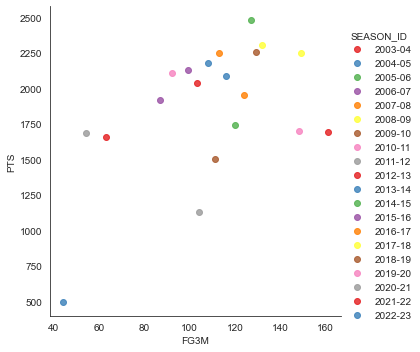

In [23]:
# correlation between Points and 3Points scored by Stephen Curry
sns.lmplot(x="FG3M", y="PTS",hue='SEASON_ID', data=career_df,  palette="Set1" )

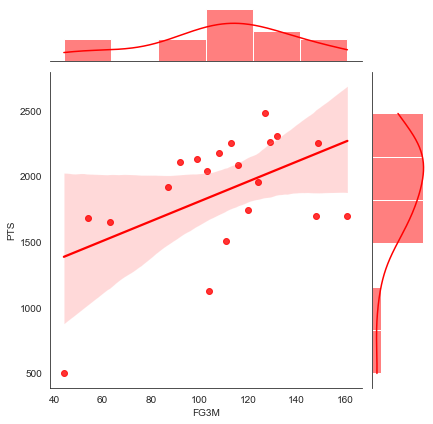

In [27]:
sns.jointplot(x="FG3M", y="PTS", data=career_df, kind="reg", color = 'red')

<AxesSubplot:>

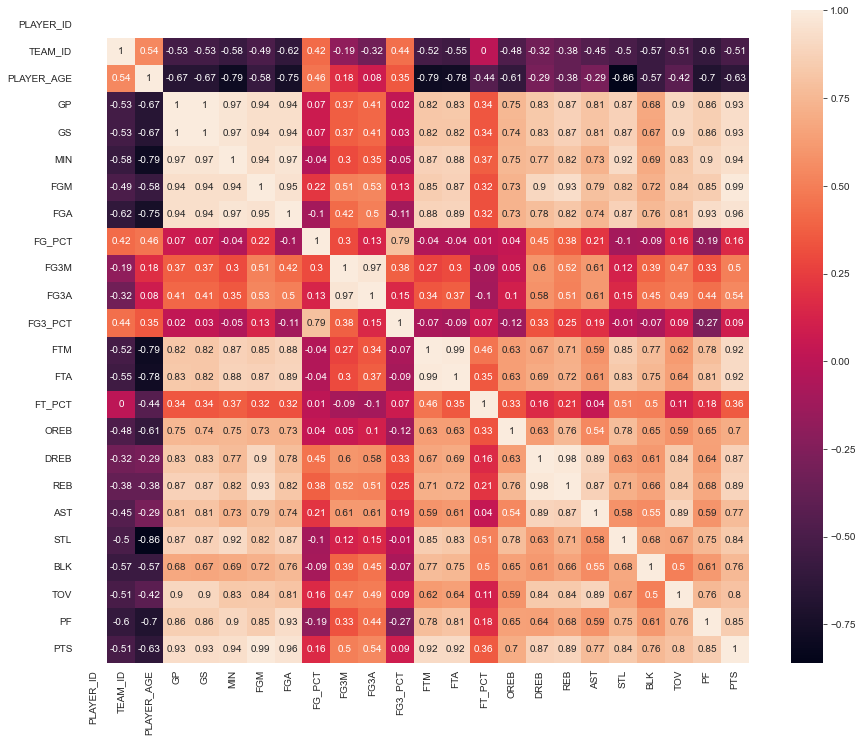

In [28]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(np.round(career_df.corr(),2), annot=True)

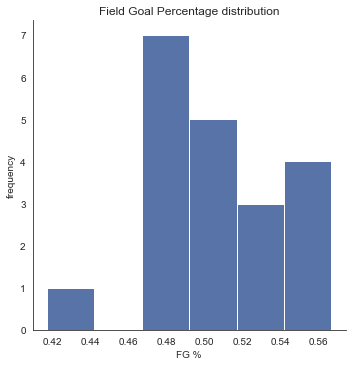

In [29]:
data = career_df['FG_PCT']
sns.displot(data).set(title='Distribution') 
plt.xlabel('FG %')
plt.ylabel('frequency')
plt.title('Field Goal Percentage distribution')
plt.show()

In [30]:
career_df.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2544,2003-04,00,1610612739,CLE,19.0,79,79,3120.0,622,1492,0.417,63,217,0.290,347,460,0.754,99,333,432,465,130,58,273,149,1654
1,2544,2004-05,00,1610612739,CLE,20.0,80,80,3388.0,795,1684,0.472,108,308,0.351,477,636,0.750,111,477,588,577,177,52,262,146,2175
2,2544,2005-06,00,1610612739,CLE,21.0,79,79,3361.0,875,1823,0.480,127,379,0.335,601,814,0.738,75,481,556,521,123,66,260,181,2478
3,2544,2006-07,00,1610612739,CLE,22.0,78,78,3190.0,772,1621,0.476,99,310,0.319,489,701,0.698,83,443,526,470,125,55,250,171,2132
4,2544,2007-08,00,1610612739,CLE,23.0,75,74,3027.0,794,1642,0.484,113,359,0.315,549,771,0.712,133,459,592,539,138,81,255,165,2250


In [31]:
features = ['PTS', 'TOV', 'STL', 'AST', 'FTA', 'FG3M','MIN', 'REB']
target = ['FT_PCT']

In [32]:
X = career_df[features]
y = career_df[target]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 500)

In [34]:
regressor = LinearRegression()   
regressor.fit(X_train, y_train) 

LinearRegression()

In [35]:
y_prediction = regressor.predict(X_test)   # test data on test sample
y_prediction

array([[0.80773011],
       [0.81643176],
       [0.7978094 ],
       [0.798478  ],
       [0.70173489],
       [0.76716506],
       [0.7189643 ],
       [0.69575261],
       [0.83361785],
       [0.71761353]])

In [36]:
import math

In [37]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [38]:
# Model performance evaluation
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))    
print(RMSE)

0.06522130542113919


In [40]:
# Displaying the predictions
pred_y = pd.DataFrame(y_prediction, columns = ['Prediction'])    
# Actual Free Throw Percentage(FT_PCT)
test_values = pd.DataFrame(y_test)   
test_values['index'] = range(0,10)
pred_y['index'] = range(0,10)
side = pd.merge(test_values, pred_y, how='left', on='index')
del side['index']
del pred_y['index']
del y_test['index']
side.head(7)

,FT_PCT,Prediction
0,0.710,0.807730
1,0.767,0.816432
2,0.712,0.797809
3,0.750,0.798478
4,0.754,0.701735
5,0.698,0.767165
6,0.665,0.718964


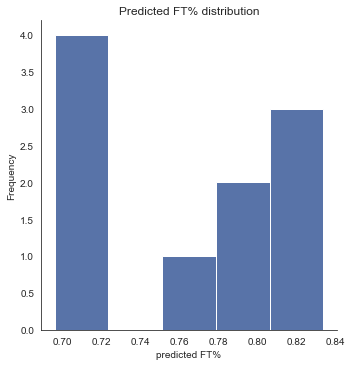

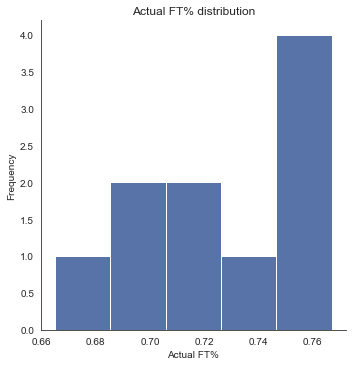

In [41]:
data = side['Prediction']
# Visualization of the predicted values
sns.displot(data)   
plt.title('Predicted FT% distribution')
plt.xlabel('predicted FT%')
plt.ylabel('Frequency')
plt.show()

data = side['FT_PCT']
# Visualization of the Actual values
sns.displot(data) 
plt.title('Actual FT% distribution')
plt.xlabel('Actual FT%')
plt.ylabel('Frequency')
plt.show()

In [42]:
## Decision Tree Regression Model

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)   # Data Modelling using Decision Tree Regression

DecisionTreeRegressor(max_depth=20)

In [45]:
y_predict = regressor.predict(X_test)   # predict freethrow percentage
y_predict

array([0.674, 0.731, 0.731, 0.731, 0.759, 0.771, 0.698, 0.756, 0.75 ,
       0.78 ])

In [46]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_predict))

In [47]:
print(RMSE)

0.03820863776687153


In [49]:
y_predict = pd.DataFrame(y_predict, columns = ['Prediction'])

test_values['index'] = range(0,10)
y_predict['index'] = range(0,10)
y_test['index'] = range(0,10)
side = pd.merge(test_values, y_predict, how='left', on='index')   

del side['index']
del y_predict['index']
del y_test['index']

side.head(15)

,FT_PCT,Prediction
0,0.710,0.674
1,0.767,0.731
2,0.712,0.731
3,0.750,0.731
4,0.754,0.759
5,0.698,0.771
6,0.665,0.698
7,0.693,0.756
8,0.738,0.750
9,0.753,0.780


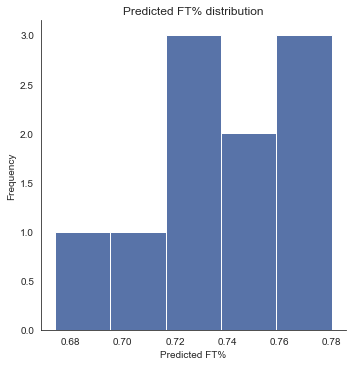

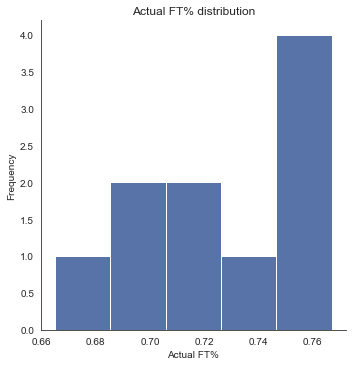

In [50]:
pre = side['Prediction']
sns.displot(pre)
plt.title('Predicted FT% distribution')
plt.xlabel('Predicted FT%')
plt.ylabel('Frequency')
plt.show()

actual = side['FT_PCT']
sns.displot(actual)
plt.title('Actual FT% distribution')
plt.xlabel('Actual FT%')
plt.ylabel('Frequency')
plt.show()

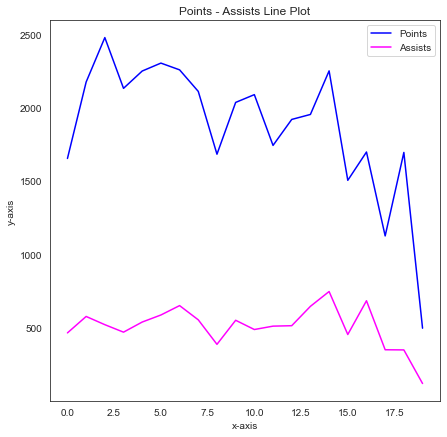

In [51]:
# Line plot of Points and Assists
career_df.PTS.plot(kind = 'line', label = 'Points', color = 'blue', figsize = (7,7))
career_df.AST.plot(kind = 'line', label = 'Assists', color = 'magenta', figsize = (7,7))

plt.title('Points - Assists Line Plot')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc = 'upper right')
plt.show()

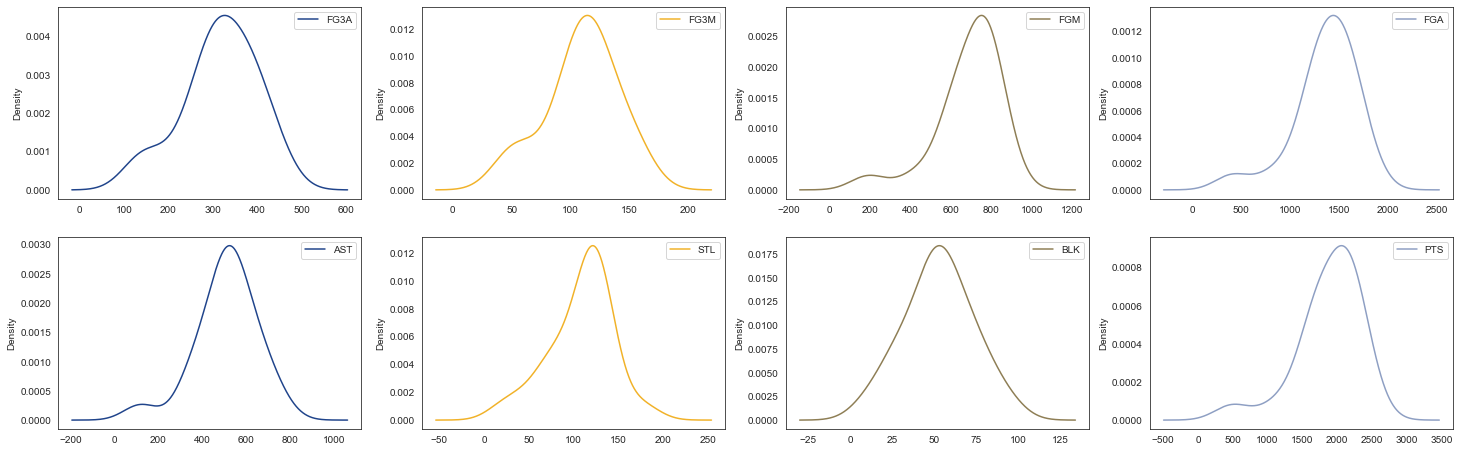

In [52]:
# Density plot
data = career_df[['FG3A','FG3M','FGM', 'FGA', 'AST', 'STL', 'BLK', 'PTS',]]
data.plot(kind='density',layout = (3,4), subplots=True, sharex=False, figsize = (25,12))
plt.show()

In [60]:
# Shot range frequency bar plots
league_avg_2 = league_avg.copy()
new_col = player_shotchart_df["SHOT_MADE_FLAG"][:20]
league_avg_2 = league_avg_2.join(new_col)

In [61]:
league_copy = league_avg_2.copy()

cross_tab = pd.crosstab(league_copy['SHOT_ZONE_RANGE'], league_copy['SHOT_MADE_FLAG'], margins=True)
cross_tab['FG_PCT'] = round(cross_tab[1]/cross_tab['All'],3)

main_data = cross_tab.drop(columns='All')[:-1]  
made = [str(round(data*100,1)) + '%' for data in main_data.FG_PCT]
missed = [str(round((1-data)*100,1)) + '%' for data in main_data.FG_PCT]
x = main_data.index
color_1 = dict(color='#345e98')
color_2 = dict(color='#d2c29d')
scatter_line = dict(color='black', width=.75)
font = dict(family='sans serif', size=12, color='white')

made_bar = go.Bar(
    text= made,
    name = 'Made',
    x = x,
    y = main_data[1],
    textfont = font,
    marker = color_1,
)

line = go.Scatter(
    x = x,
    y = main_data[1],
    line = scatter_line,
    name='Made_line'
)

missed_bar = go.Bar(
    text = missed,
    name ='Missed',
    x = x,
    y = main_data[0],
    textfont = font,
    marker = color_2,
)

fig_data = [made_bar, missed_bar, line]

fig = go.Figure(data=fig_data)

fig.update_layout(go.Layout(
    
    title = 'Field Goal percentage by Shot Zone Range',
    yaxis_title = 'Frequency of Shots',
    xaxis_title = 'Shot Zone Range',
    showlegend =True,
    barmode='stack'
))

plotly.offline.iplot(fig)

In [62]:
league_copy = league_avg_2.copy()

cross_tab = pd.crosstab(league_copy['SHOT_ZONE_AREA'], league_copy['SHOT_MADE_FLAG'], margins=True)
cross_tab['FG_PCT'] = round(cross_tab[1]/cross_tab['All'],3)

main_data = cross_tab.drop(columns='All')[:-1]  
made = [str(round(data*100,1)) + '%' for data in main_data.FG_PCT]
missed = [str(round((1-data)*100,1)) + '%' for data in main_data.FG_PCT]
x = main_data.index
color_1 = dict(color='#40826d')
color_2 = dict(color='#E85285')
scatter_line = dict(color='black', width=.75)
font = dict(family='sans serif', size=12, color='white')

made_bar = go.Bar(
    text= made,
    name = 'Made',
    x = x,
    y = main_data[1],
    textfont = font,
    marker = color_1,
)

line = go.Scatter(
    x = x,
    y = main_data[1],
    line = scatter_line,
    name='Made_line'
)

missed_bar = go.Bar(
    text = missed,
    name ='Missed',
    x = x,
    y = main_data[0],
    textfont = font,
    marker = color_2,
)

fig_data = [made_bar, missed_bar, line]

fig = go.Figure(data=fig_data)

fig.update_layout(go.Layout(
    
    title = 'Field Goal percentage by Shot Zone Area',
    yaxis_title = 'Frequency of Shots',
    xaxis_title = 'Shot Zone Area',
    showlegend =True,
    barmode='stack'
))

plotly.offline.iplot(fig)

##

In [76]:
import pandas as pd
add_df = pd.DataFrame(pd.read_excel("C:\\Users\\DELL\\Desktop\\addd_LeBron.xlsx"))

In [77]:
import plotly.express as px
# Box and Scatter Interactive
performance_lab = {"PTS":"Total_Points", "AST": "Assists", "REB":"Total_Rebounds"}
color = px.colors.sequential.Viridis

fig=px.scatter(add_df, x = "PTS", marginal_x = "box",
               y = "REB", marginal_y = "box",
               color_continuous_scale = color,
               size = "USG_PCT", color = "AST", labels = performance_lab,
               size_max = 15, hover_name = "REB")

fig.update_layout(title_text='LeBron James Performance', template="plotly_white")
fig.show()

### Shot zone range pie chart

In [73]:
range_val = league_copy['SHOT_ZONE_RANGE'].value_counts()
range_lab = league_copy['SHOT_ZONE_RANGE'].unique()
font = dict(size=20)

all_col = ['#FEBFB3', '#E1396C', '#D0F9B1', '#800080']
pie_line = dict(color='#000000', width=1)
pie_mark = dict(colors = all_col, line = pie_line)

pie_chart = go.Pie(marker = pie_mark, labels=range_lab, values=range_val, 
                   textinfo='value+percent',
                   textfont=font, hoverinfo='label+percent')

plotly.offline.iplot([pie_chart])

In [74]:
# Histogram Plots
fig = make_subplots(rows=1, cols=2)

color_1 = dict(color='orange')
color_2 = dict(color='green')

fig.add_trace(
    go.Histogram(x=add_df['REB'], marker=color_1), row=1, col=1)

fig.add_trace(
    go.Histogram(x=add_df['AST'], marker=color_2), row=1, col=2)

fig.update_layout(title_text="Rebound and Points Histogram plots", height=550, width=850)

fig.show()

In [78]:
import plotly.graph_objects as go
# Bees warm plot
fig = go.Figure()

background_color = "rgba(0,0,0,0)"

fig.add_trace(go.Box(y=career_df["PTS"], 
                    fillcolor=background_color,
                    boxpoints = "all",
                    marker_color = "#FF851B",
                    jitter=1,
                    pointpos=0.1,
                    line={
                        "width": 0
                    },
                     name = "Points"))

fig.add_trace(go.Box(y=career_df["AST"], 
                    fillcolor=background_color,
                    boxpoints="all",
                    marker_color = 'royalblue',
                    jitter=1,
                    pointpos=0.1,
                    line={
                        "width": 0
                    },
                     name = "Assists"))

fig.add_trace(go.Box(y=career_df["REB"], 
                    fillcolor=background_color,
                    boxpoints="all",
                    jitter=1,
                    pointpos=0.1, 
                    line={
                        "width": 0
                    },
                     name="Rebounds"))

fig.update_layout(yaxis_title='Frequency', showlegend=False)
fig.show()